<a href="https://www.kaggle.com/code/manish5323/exploring-palmer-penguins-the-modern-iris-datase?scriptVersionId=228222954" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/palmer-penguins-datasetalternative-iris-dataset/penguins.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Configure visualizations
sns.set(style="whitegrid")

In [4]:
# Load the data
file_path = "/kaggle/input/palmer-penguins-datasetalternative-iris-dataset/penguins.csv"
df = pd.read_csv(file_path)

In [5]:
df.isnull().sum()



species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
df_cleaned = df.dropna()

print(f"Original shape: {df.shape}")
print(f"After dropping missing values: {df_cleaned.shape}")

df_cleaned.head()


Original shape: (344, 7)
After dropping missing values: (333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [7]:
df.describe(include='all')




/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
print("Missing values per column:\n")
print(df.isnull().sum())

Missing values per column:

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [10]:
df_cleaned = df.dropna()

print("\nShape after dropping missing values:", df_cleaned.shape)


Shape after dropping missing values: (333, 7)


In [11]:
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()


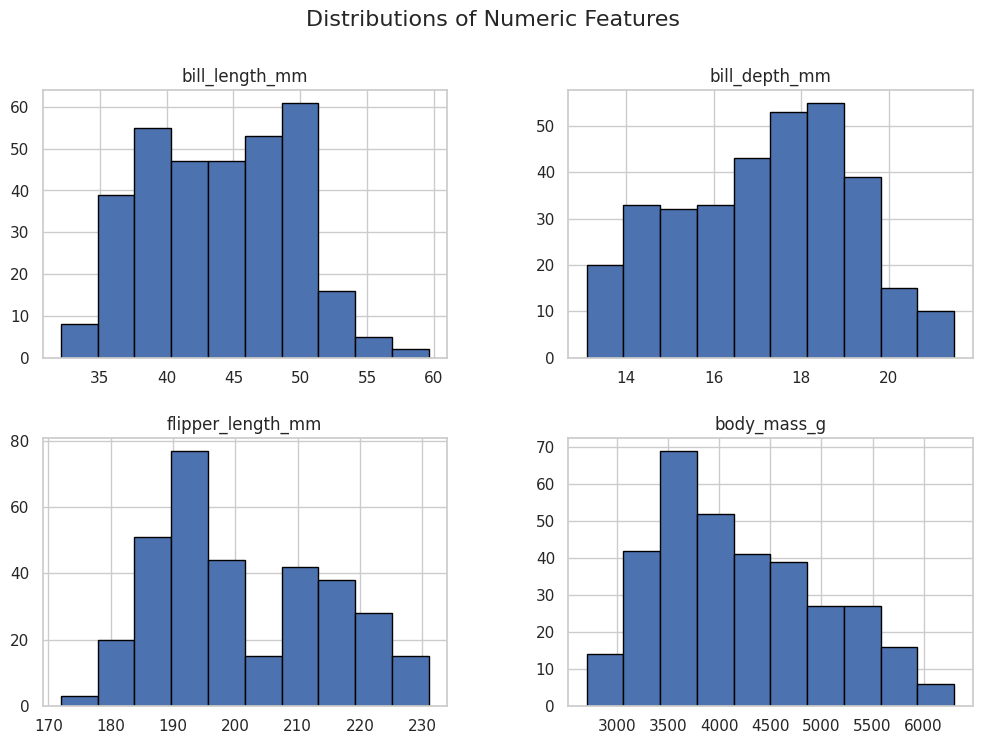

In [12]:
#Distribution Plots for Numeric Columns
df_cleaned[numeric_cols].hist(figsize=(12, 8), edgecolor='black')
plt.suptitle('Distributions of Numeric Features', fontsize=16)
plt.show()

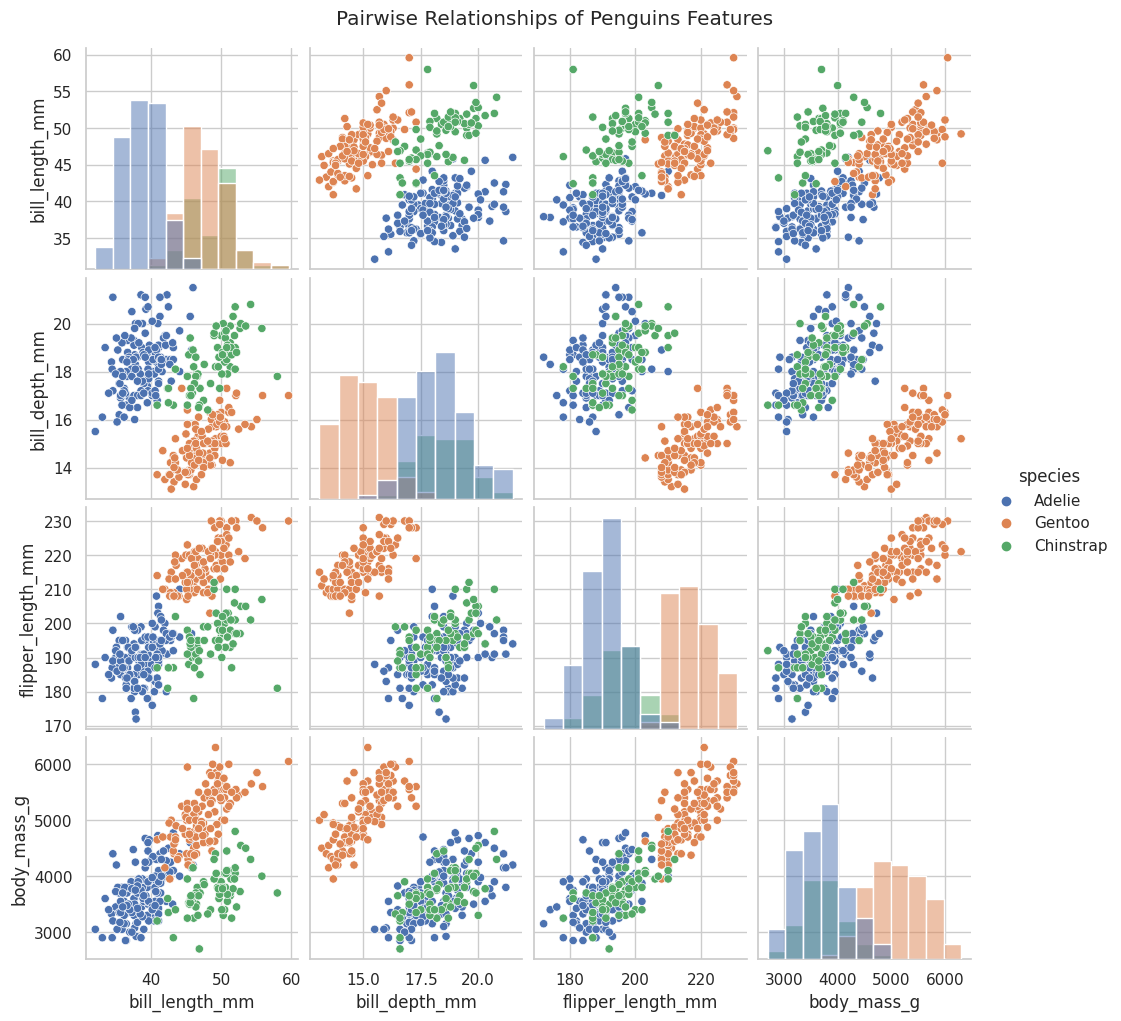

In [13]:
#Pairplot to See Relationships
sns.pairplot(df_cleaned, hue='species', diag_kind='hist')
plt.suptitle('Pairwise Relationships of Penguins Features', y=1.02)
plt.show()

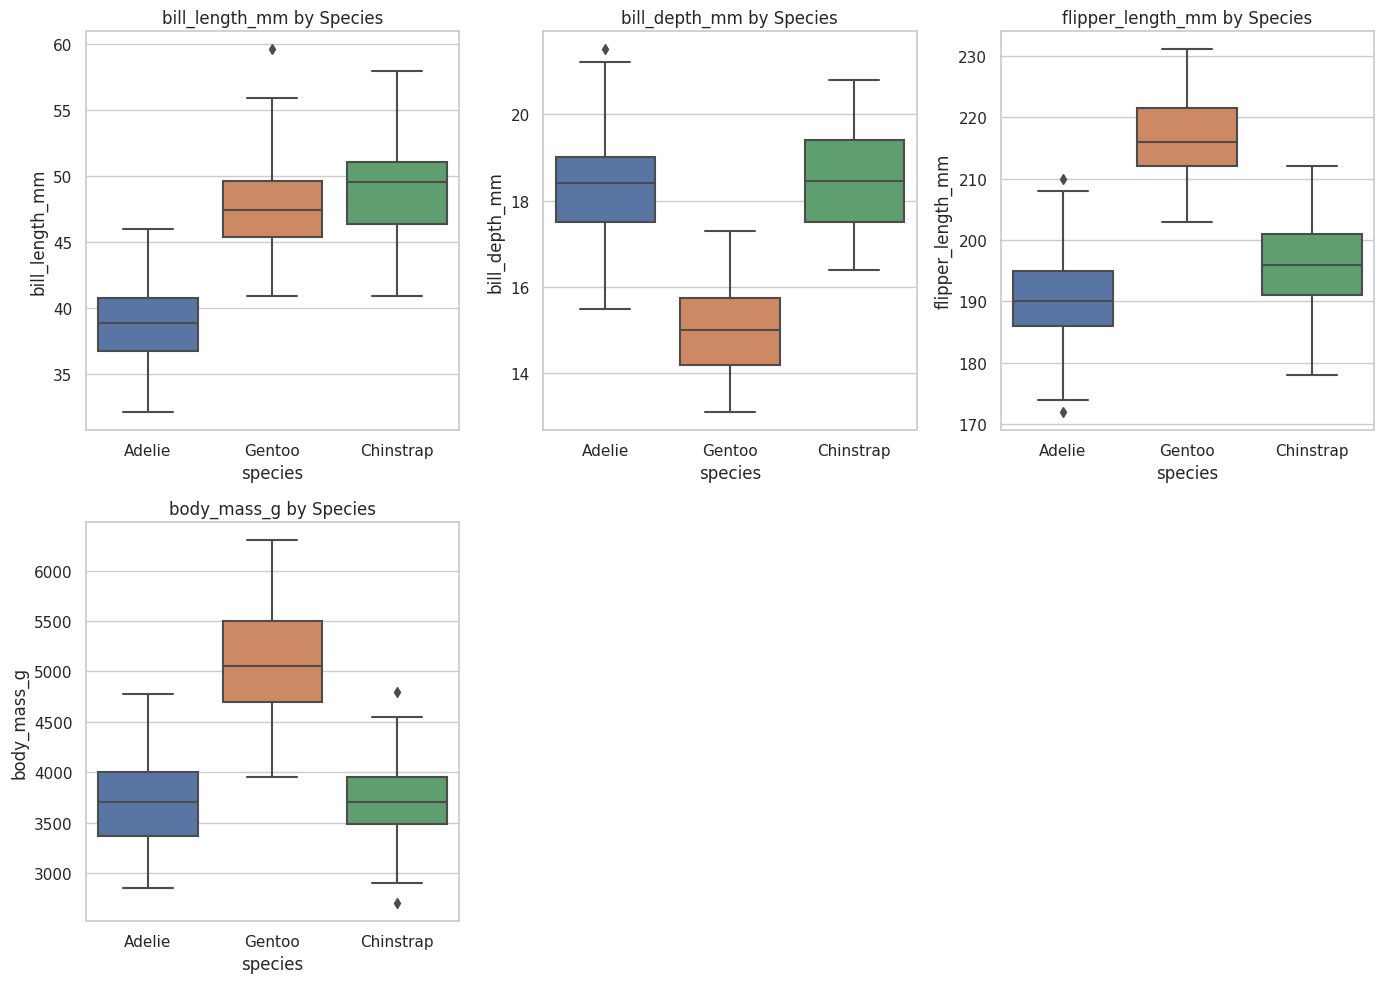

In [14]:
#Boxplots for Each Numeric Feature vs Species
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='species', y=col, data=df_cleaned)
    plt.title(f'{col} by Species')
plt.tight_layout()
plt.show()

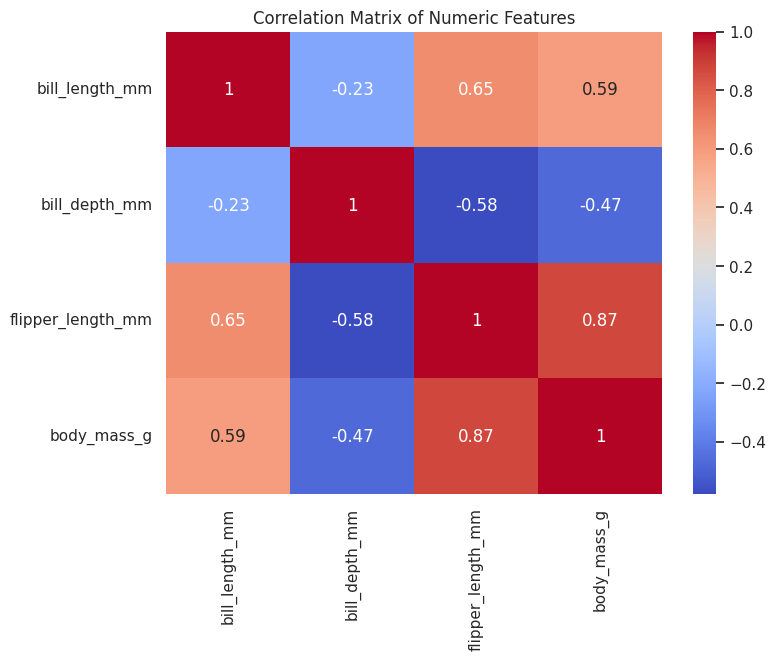

In [15]:
#Correlation Heatmap
# Compute correlation matrix
corr = df_cleaned[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()